In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [2]:
from __future__ import print_function, division
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [4]:
study_time = torch.FloatTensor([[10], [11], [14], [18], [19], [22], [24]])

grade = torch.FloatTensor([[45], [50], [55], [70], [58], [80], [85]])

In [9]:
x_train = study_time
y_train = grade
print(x_train.shape, '|', x_train.dim())

torch.Size([7, 1]) | 2


In [10]:

import matplotlib.pyplot as plt

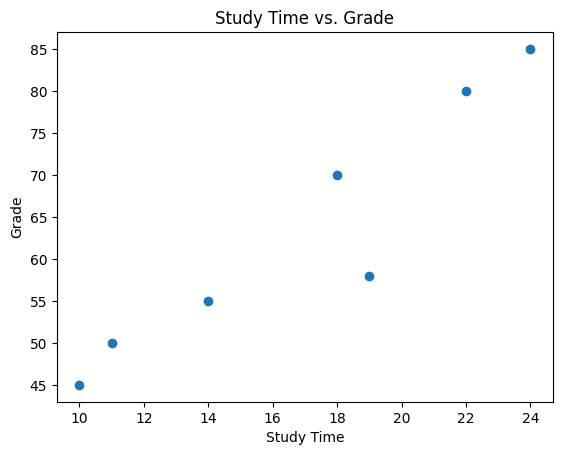

In [11]:
plt.scatter(x_train, y_train)
plt.xlabel('Study Time')
plt.ylabel('Grade')
plt.title('Study Time vs. Grade')
plt.show()

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [12]:
import pathlib
path = pathlib.Path('/content/gdrive/My Drive/health_data.csv')

data = pd.read_csv(path)
data.head()

,Unnamed: 0,height,weight
0,0,158.9,52.015
1,1,173.6,66.910
2,2,174.4,66.000
3,3,169.2,NaN
4,4,154.0,49.275


In [22]:
null_data = data.isnull()

# NaN 값 또는 null 값이 있는 행 출력
print("NaN 또는 null 값이 있는 행:\n", null_data)

NaN 또는 null 값이 있는 행:
     Unnamed: 0  height  weight
0        False   False   False
1        False   False   False
2        False   False   False
4        False   False   False
5        False   False   False
6        False   False   False
7        False   False   False
8        False   False   False
9        False   False   False
10       False   False   False
11       False   False   False
12       False   False   False
13       False   False   False
14       False   False   False
15       False   False   False
16       False   False   False
17       False   False   False
18       False   False   False
19       False   False   False
20       False   False   False
21       False   False   False
22       False   False   False
23       False   False   False
24       False   False   False
25       False   False   False
26       False   False   False
27       False   False   False
28       False   False   False
29       False   False   False
30       False   False   False
31       False   

In [23]:
data = data.dropna(axis=0).reset_index(drop=True)

# 제거된 데이터 확인
data.head()

,Unnamed: 0,height,weight
0,0,158.9,52.015
1,1,173.6,66.910
2,2,174.4,66.000
3,4,154.0,49.275
4,5,177.7,69.820


In [36]:
# 데이터를 PyTorch tensor로 변환
height = torch.tensor(data.height)
weight = torch.tensor(data.weight)

In [37]:
x_train = height.view([height.shape[0],1]).float()
y_train = weight.view([weight.shape[0],1]).float()

In [40]:
x_train = torch.cat((torch.rand(50,1)*45+145,x_train), axis = 0)
y_train = torch.cat((torch.rand(50,1)*40+45,y_train), axis = 0)

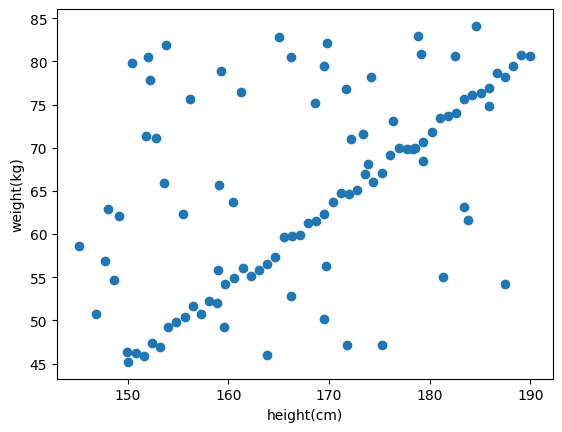

In [51]:
x = x_train
y = y_train

plt.scatter(x, y)
plt.xlabel('height(cm)')
plt.ylabel('weight(kg)')

plt.show()

In [53]:
import torch
import matplotlib.pyplot as plt

iter = 50000 #loss값을 구하는 횟수로 총 50000번
weight_max = 100
bias_max = 150
min_loss = 1000000 #업데이트 된 가장 작은 값의 loss 저장
min_W = 0
min_b = 0
iteration = 0

x = x_train
y = y_train

def loss_fn(hypo, GT):
  return sum(abs(hypo - GT))

for i in range(iter):
  W = (torch.rand(1)-0.5) * weight_max # [-50,50]
  b = (-torch.rand(1)) * bias_max # [-150 , 0]
  hypothesis = x * W + b

  cur_loss = loss_fn(hypothesis, y)

  if cur_loss < min_loss:
    min_loss = cur_loss
    min_W = W
    min_b = b

  iteration += 1
  print("iteration : ",iteration)
  print("min_loss : " , min_loss)
  print("min_W : " ,min_W,"min_b : " ,min_b)


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
min_loss :  tensor([736.2537])
min_W :  tensor([0.8009]) min_b :  tensor([-72.3559])
iteration :  48335
min_loss :  tensor([736.2537])
min_W :  tensor([0.8009]) min_b :  tensor([-72.3559])
iteration :  48336
min_loss :  tensor([736.2537])
min_W :  tensor([0.8009]) min_b :  tensor([-72.3559])
iteration :  48337
min_loss :  tensor([736.2537])
min_W :  tensor([0.8009]) min_b :  tensor([-72.3559])
iteration :  48338
min_loss :  tensor([736.2537])
min_W :  tensor([0.8009]) min_b :  tensor([-72.3559])
iteration :  48339
min_loss :  tensor([736.2537])
min_W :  tensor([0.8009]) min_b :  tensor([-72.3559])
iteration :  48340
min_loss :  tensor([736.2537])
min_W :  tensor([0.8009]) min_b :  tensor([-72.3559])
iteration :  48341
min_loss :  tensor([736.2537])
min_W :  tensor([0.8009]) min_b :  tensor([-72.3559])
iteration :  48342
min_loss :  tensor([736.2537])
min_W :  tensor([0.8009]) min_b :  tensor([-72.3559])
iteration :  48343
min_loss :  tensor([736.2537

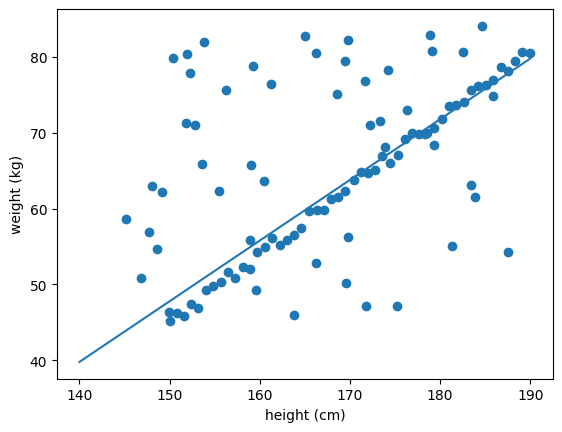

In [54]:
import matplotlib.pyplot as plt
import numpy as np

x = x_train
y = y_train

plt.scatter(x, y)

t = np.arange(140.,190.,0.001)

plt.plot(t, min_W*t+min_b)
plt.xlabel('height (cm)')
plt.ylabel('weight (kg)')
plt.show()